In [1]:
# ipython
%matplotlib inline

from IPython.display import display as d
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(12,12)})
sns.set_style("white")
import glob
import json
import os
import sys
import json
import multiprocessing
import shutil
from pprint import pprint
import matplotlib.pyplot as plt


In [2]:
dlv = pd.DataFrame() # dataframe for all likes and views

In [3]:
def isfile(x):
    if os.path.isfile(x):
        return True
    return False

In [4]:
da = pd.read_csv("pixabay_first50k/ratings.csv")
da = da.rename(
    columns={
        "image": "image_path"
    }
)[["image_path", "likes", "views"]]
da["image_path"] = da["image_path"].apply(lambda x: "pixabay_first50k/images/" + os.path.basename(x))

da["isfile"] = da["image_path"].apply(isfile)
da = da[da["isfile"]]
d(da)
da["real"] = True
dlv = dlv.append(da[["image_path", "likes", "views", "real"]], ignore_index=True)
d(dlv)

,image_path,likes,views,isfile
0,pixabay_first50k/images/duck-4934652.jpg,1,83,True
1,pixabay_first50k/images/frog-3386397.jpg,3,251,True
2,pixabay_first50k/images/gulls-84208.jpg,2,589,True
3,pixabay_first50k/images/swan-fight-4066486.jpg,1,292,True
4,pixabay_first50k/images/fragrapanti-4366075.jpg,3,410,True
...,...,...,...,...
193,pixabay_first50k/images/spices-2548653.jpg,489,119530,True
194,pixabay_first50k/images/cross-2713356.jpg,968,468543,True
195,pixabay_first50k/images/shellfish-3062011.jpg,561,176678,True
197,pixabay_first50k/images/kingfisher-1068684.jpg,483,66626,True


,image_path,likes,views,real
0,pixabay_first50k/images/duck-4934652.jpg,1,83,True
1,pixabay_first50k/images/frog-3386397.jpg,3,251,True
2,pixabay_first50k/images/gulls-84208.jpg,2,589,True
3,pixabay_first50k/images/swan-fight-4066486.jpg,1,292,True
4,pixabay_first50k/images/fragrapanti-4366075.jpg,3,410,True
...,...,...,...,...
186,pixabay_first50k/images/spices-2548653.jpg,489,119530,True
187,pixabay_first50k/images/cross-2713356.jpg,968,468543,True
188,pixabay_first50k/images/shellfish-3062011.jpg,561,176678,True
189,pixabay_first50k/images/kingfisher-1068684.jpg,483,66626,True


In [5]:
da = pd.read_csv("500px_cc0/ratings.csv")
da["image_path"] = da["image_path"].apply(lambda x: os.path.basename(x))
d(da.head())
print(da.columns)

,aperture,camera,camera_info,category,comments,comments_count,created_at,description,editored_by,editors_choice,...,user,user_id,voted,votes_count,watermark,width,image_path,like_view,min_max_like_view,5i_min_max_like_view
0,4.0,NIKON 1 V1,"{'brand': {'id': 2, 'name': 'Nikon', 'slug': '...",500px,[],0,2014-10-09T01:28:15+00:00,NaN,NaN,False,...,"{'about': None, 'active': 1, 'affection': 0, '...",9905427,NaN,0,False,1936,85841635_Untitled.jpg,0.000000,0.000000,0.0
1,6.3,Canon EOS REBEL T3,"{'brand': {'id': 1, 'name': 'Canon', 'slug': '...",500px,[],0,2015-11-24T12:18:44+00:00,Park - This image is CC0 licensed from us so d...,NaN,False,...,"{'about': 'Design products and assets,crafted ...",15020853,NaN,0,False,4272,130002537_Park.jpg,0.000000,0.000000,0.0
2,9.0,Canon EOS REBEL T3,"{'brand': {'id': 1, 'name': 'Canon', 'slug': '...",500px,[],0,2015-11-24T12:15:09+00:00,Boat - This image is CC0 licensed from us so d...,NaN,False,...,"{'about': 'Design products and assets,crafted ...",15020853,NaN,0,False,4272,130002303_Boat.jpg,0.000000,0.000000,0.0
3,5.6,Canon EOS REBEL T3,"{'brand': {'id': 1, 'name': 'Canon', 'slug': '...",500px,[],0,2015-11-24T12:20:54+00:00,Shoes - This image is CC0 licensed from us so ...,NaN,False,...,"{'about': 'Design products and assets,crafted ...",15020853,NaN,0,False,4230,130002697_Shoes.jpg,0.000000,0.000000,0.0
4,0.0,NaN,NaN,500px,[],0,2019-09-26T08:06:12+00:00,Flat lay of business concept,NaN,False,...,"{'about': 'Research, Photography & Internet Ma...",1000467504,NaN,1,False,2500,1003502191_Flat lay of business concept.jpg,0.145293,0.184089,0.0


Index(['aperture', 'camera', 'camera_info', 'category', 'comments',
       'comments_count', 'created_at', 'description', 'editored_by',
       'editors_choice', 'editors_choice_date', 'extension', 'feature',
       'feature_date', 'fill_switch', 'focal_length', 'has_nsfw_tags',
       'height', 'highest_rating', 'highest_rating_date', 'id', 'image_format',
       'image_url', 'images', 'iso', 'latitude', 'lens', 'lens_info',
       'licensing_info', 'licensing_status', 'licensing_type',
       'licensing_usage', 'liked', 'liked_by', 'location', 'location_details',
       'longitude', 'name', 'nsfw', 'positive_votes_count', 'privacy',
       'privacy_level', 'profile', 'rating', 'shutter_speed', 'status',
       'store_height', 'store_license', 'store_width', 'subcategory', 'tags',
       'taken_at', 'times_viewed', 'url', 'user', 'user_id', 'voted',
       'votes_count', 'watermark', 'width', 'image_path', 'like_view',
       'min_max_like_view', '5i_min_max_like_view'],
      dtype='

In [6]:
da["image_id"] = da["image_path"].apply(lambda x: os.path.basename(x).split("_")[0])

def get(pos, llist):
    if pos >= len(llist):
        return ""
    return llist[pos]

da["image_path_new"] = da["image_id"].apply(
    lambda x: 
        get(0, list(glob.glob("500px_cc0/images/" + x + "*")))
)
da = da[da["image_path_new"] != ""][["image_path_new", "positive_votes_count", "times_viewed"]].copy()
d(da)

,image_path_new,positive_votes_count,times_viewed
0,500px_cc0/images/85841635_Untitled.jpg,0,117
1,500px_cc0/images/130002537_Park.jpg,0,49
2,500px_cc0/images/130002303_Boat.jpg,0,44
4,500px_cc0/images/1003502191_Flat_lay_of_busine...,1,117
5,500px_cc0/images/130002307_IPhone.jpg,1,81
...,...,...,...
185,500px_cc0/images/252756875_cornflower_seeds.jpg,23,151
186,500px_cc0/images/139228225_Sunset-PicLiberum.c...,158,828
187,500px_cc0/images/302137935_Cherry_Blossom.jpg,32,99
188,500px_cc0/images/242215175_Guy_enjoying_sunset...,19,91


In [7]:
da = da.rename(
    columns={
        "image_path_new": "image_path",
        "positive_votes_count": "likes",
        "times_viewed": "views"
    }
)
d(da)
da["real"] = True
dlv = dlv.append(da, ignore_index=True)
d(dlv)

,image_path,likes,views
0,500px_cc0/images/85841635_Untitled.jpg,0,117
1,500px_cc0/images/130002537_Park.jpg,0,49
2,500px_cc0/images/130002303_Boat.jpg,0,44
4,500px_cc0/images/1003502191_Flat_lay_of_busine...,1,117
5,500px_cc0/images/130002307_IPhone.jpg,1,81
...,...,...,...
185,500px_cc0/images/252756875_cornflower_seeds.jpg,23,151
186,500px_cc0/images/139228225_Sunset-PicLiberum.c...,158,828
187,500px_cc0/images/302137935_Cherry_Blossom.jpg,32,99
188,500px_cc0/images/242215175_Guy_enjoying_sunset...,19,91


,image_path,likes,views,real
0,pixabay_first50k/images/duck-4934652.jpg,1,83,True
1,pixabay_first50k/images/frog-3386397.jpg,3,251,True
2,pixabay_first50k/images/gulls-84208.jpg,2,589,True
3,pixabay_first50k/images/swan-fight-4066486.jpg,1,292,True
4,pixabay_first50k/images/fragrapanti-4366075.jpg,3,410,True
...,...,...,...,...
354,500px_cc0/images/252756875_cornflower_seeds.jpg,23,151,True
355,500px_cc0/images/139228225_Sunset-PicLiberum.c...,158,828,True
356,500px_cc0/images/302137935_Cherry_Blossom.jpg,32,99,True
357,500px_cc0/images/242215175_Guy_enjoying_sunset...,19,91,True


/home/sgoering/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


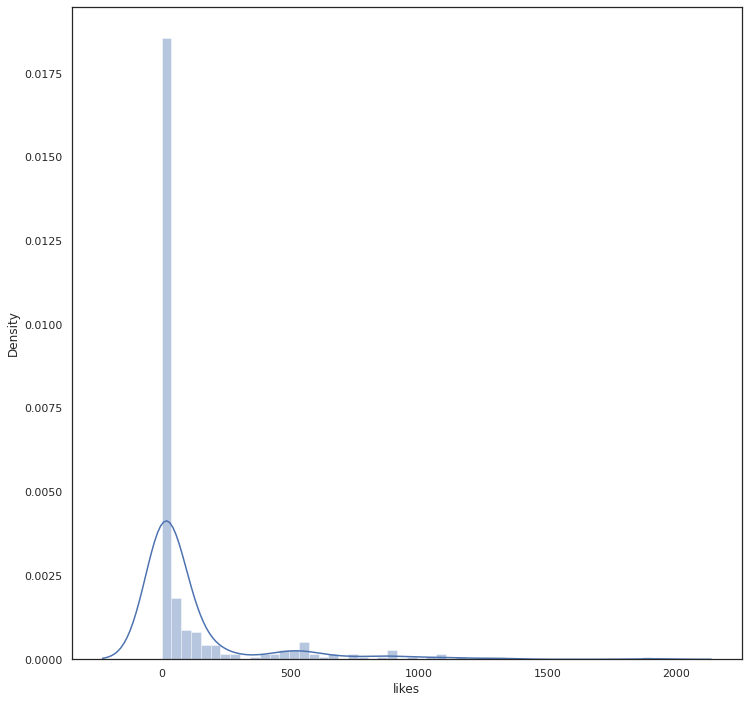

In [8]:
sns.distplot(dlv["likes"])

/home/sgoering/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


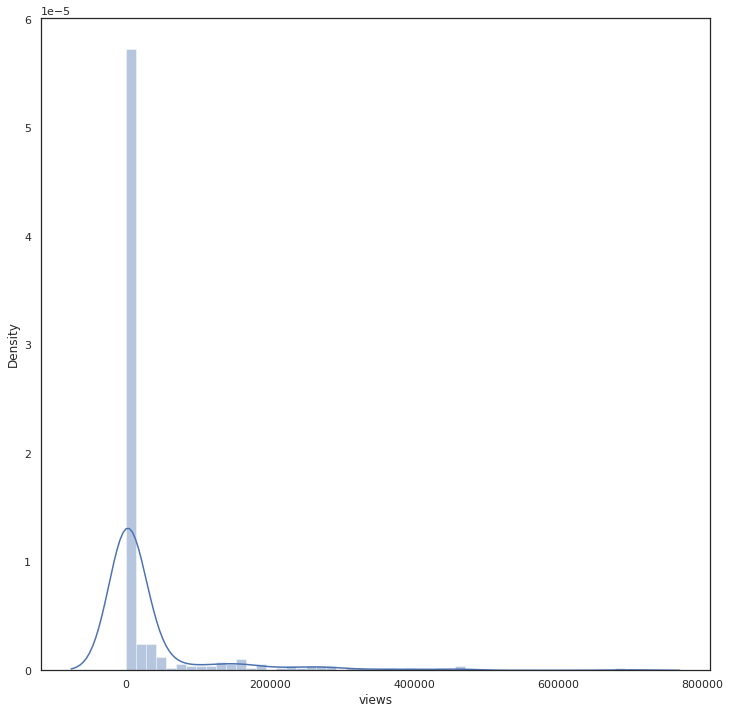

In [9]:
sns.distplot(dlv["views"])

In [10]:

da = pd.read_csv("aadb/ratings.csv")
da["image"] = da["image"].apply(lambda x: "aadb/images/" + os.path.basename(x))



da["isfile"] = da["image"].apply(isfile)
da = da[da["isfile"]].copy()

def random_likes_views(x):
    sample = dlv.sample(1)
    return sample["likes"].values[0], sample["views"].values[0]

da[["likes", "views"]] = da.apply(random_likes_views, axis=1, result_type="expand")

d(da)

,image,url,count,mean,max,min,norm_mean,5i_mean,isfile,likes,views
0,aadb/images/farm1_336_20161142751_c10d128c7d_b...,https://farm1.staticflickr.com/336/20161142751...,5,0.2,1,0,0.04,0,True,4,126
4,aadb/images/farm1_263_19568286334_8d2ea52ce8_b...,https://farm1.staticflickr.com/263/19568286334...,5,0.0,0,0,0.00,0,True,16,821
7,aadb/images/farm1_289_19532950774_54aa089edf_b...,https://farm1.staticflickr.com/289/19532950774...,5,0.0,0,0,0.00,0,True,3,156
10,aadb/images/farm1_527_19534187673_2cc822690b_b...,https://farm1.staticflickr.com/527/19534187673...,5,0.0,0,0,0.00,0,True,9,1378
12,aadb/images/farm1_355_20167773412_57c4c8c921_b...,https://farm1.staticflickr.com/355/20167773412...,5,0.6,3,0,0.12,0,True,27,155
...,...,...,...,...,...,...,...,...,...,...,...
207,aadb/images/farm1_286_19998340455_4629caa4ca_b...,https://farm1.staticflickr.com/286/19998340455...,5,5.0,5,5,1.00,5,True,19,91
208,aadb/images/farm1_263_20317768422_4a8537aff4_b...,https://farm1.staticflickr.com/263/20317768422...,5,5.0,5,5,1.00,5,True,73,14717
209,aadb/images/farm1_297_19951672000_af582f2811_b...,https://farm1.staticflickr.com/297/19951672000...,5,5.0,5,5,1.00,5,True,4,336
210,aadb/images/farm1_399_19971092260_7053a35a7d_b...,https://farm1.staticflickr.com/399/19971092260...,5,5.0,5,5,1.00,5,True,7,140


In [11]:
da = da.rename(
    columns={
        "image": "image_path"
    }
)[["image_path", "likes", "views"]]
da["real"] = False
d(da)

,image_path,likes,views,real
0,aadb/images/farm1_336_20161142751_c10d128c7d_b...,4,126,False
4,aadb/images/farm1_263_19568286334_8d2ea52ce8_b...,16,821,False
7,aadb/images/farm1_289_19532950774_54aa089edf_b...,3,156,False
10,aadb/images/farm1_527_19534187673_2cc822690b_b...,9,1378,False
12,aadb/images/farm1_355_20167773412_57c4c8c921_b...,27,155,False
...,...,...,...,...
207,aadb/images/farm1_286_19998340455_4629caa4ca_b...,19,91,False
208,aadb/images/farm1_263_20317768422_4a8537aff4_b...,73,14717,False
209,aadb/images/farm1_297_19951672000_af582f2811_b...,4,336,False
210,aadb/images/farm1_399_19971092260_7053a35a7d_b...,7,140,False


/home/sgoering/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


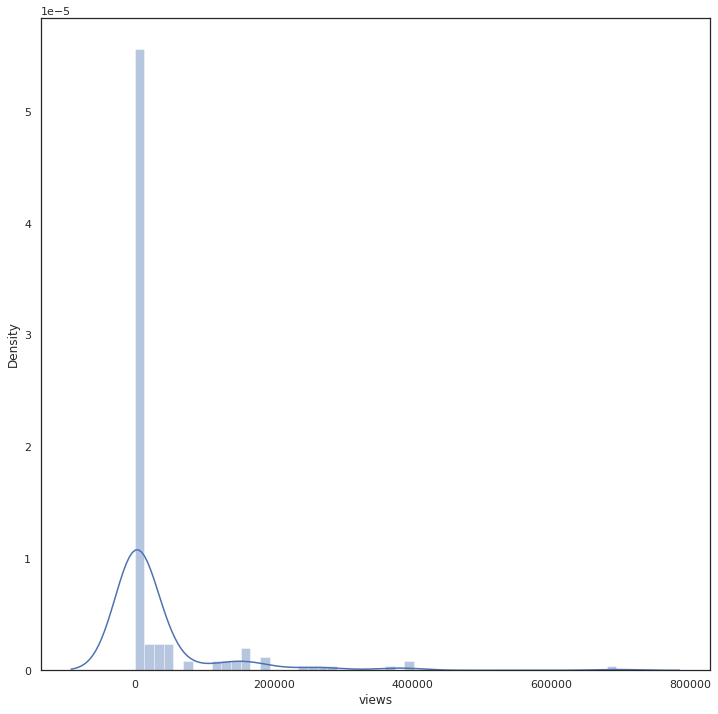

In [12]:
sns.distplot(da["views"])

In [13]:
dlv = dlv.append(da, ignore_index=True)
d(dlv)

,image_path,likes,views,real
0,pixabay_first50k/images/duck-4934652.jpg,1,83,True
1,pixabay_first50k/images/frog-3386397.jpg,3,251,True
2,pixabay_first50k/images/gulls-84208.jpg,2,589,True
3,pixabay_first50k/images/swan-fight-4066486.jpg,1,292,True
4,pixabay_first50k/images/fragrapanti-4366075.jpg,3,410,True
...,...,...,...,...
537,aadb/images/farm1_286_19998340455_4629caa4ca_b...,19,91,False
538,aadb/images/farm1_263_20317768422_4a8537aff4_b...,73,14717,False
539,aadb/images/farm1_297_19951672000_af582f2811_b...,4,336,False
540,aadb/images/farm1_399_19971092260_7053a35a7d_b...,7,140,False


,image_path,likes,views
0,ava/images/43085.jpg,5,101
1,ava/images/776337.jpg,552,268672
2,ava/images/638912.jpg,115,11182
4,ava/images/335761.jpg,57,9971
5,ava/images/362908.jpg,600,363213
...,...,...,...
196,ava/images/780373.jpg,36,264
197,ava/images/51662.jpg,17,164
198,ava/images/267110.jpg,4,226
199,ava/images/727495.jpg,22,124


/home/sgoering/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


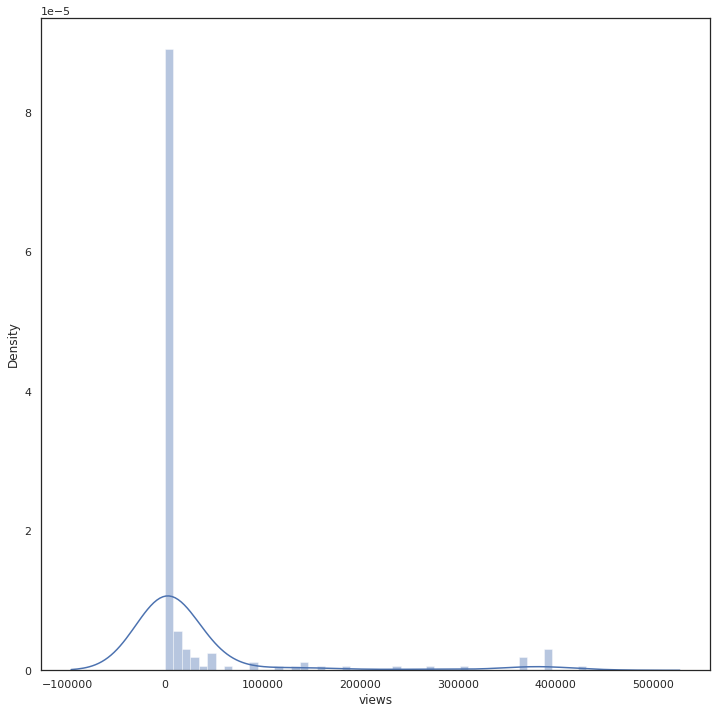

In [14]:
da = pd.read_csv("ava/ratings.csv")
da["image_path"] = da["file"].apply(lambda x: "ava/images/" + os.path.basename(x))
da["isfile"] = da["image_path"].apply(isfile)
da = da[da["isfile"]]
da[["likes", "views"]] = da.apply(random_likes_views, axis=1, result_type="expand")

da = da[["image_path", "likes", "views"]]
d(da)
da["real"] =False
sns.distplot(da["views"])

In [15]:
dlv = dlv.append(da, ignore_index=True)

In [16]:
d(dlv)

,image_path,likes,views,real
0,pixabay_first50k/images/duck-4934652.jpg,1,83,True
1,pixabay_first50k/images/frog-3386397.jpg,3,251,True
2,pixabay_first50k/images/gulls-84208.jpg,2,589,True
3,pixabay_first50k/images/swan-fight-4066486.jpg,1,292,True
4,pixabay_first50k/images/fragrapanti-4366075.jpg,3,410,True
...,...,...,...,...
723,ava/images/780373.jpg,36,264,False
724,ava/images/51662.jpg,17,164,False
725,ava/images/267110.jpg,4,226,False
726,ava/images/727495.jpg,22,124,False


,image_path,likes,views
1,koniq10k/images/11341117543.jpg,19,91
2,koniq10k/images/5646738672.jpg,600,363213
3,koniq10k/images/2832980159.jpg,2,108
4,koniq10k/images/8436817796.jpg,5,121
5,koniq10k/images/4045599734.jpg,10,93
...,...,...,...
195,koniq10k/images/610496828.jpg,50,6186
196,koniq10k/images/5435410945.jpg,153,50840
197,koniq10k/images/5456373866.jpg,37,817
198,koniq10k/images/8385411442.jpg,0,42


/home/sgoering/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


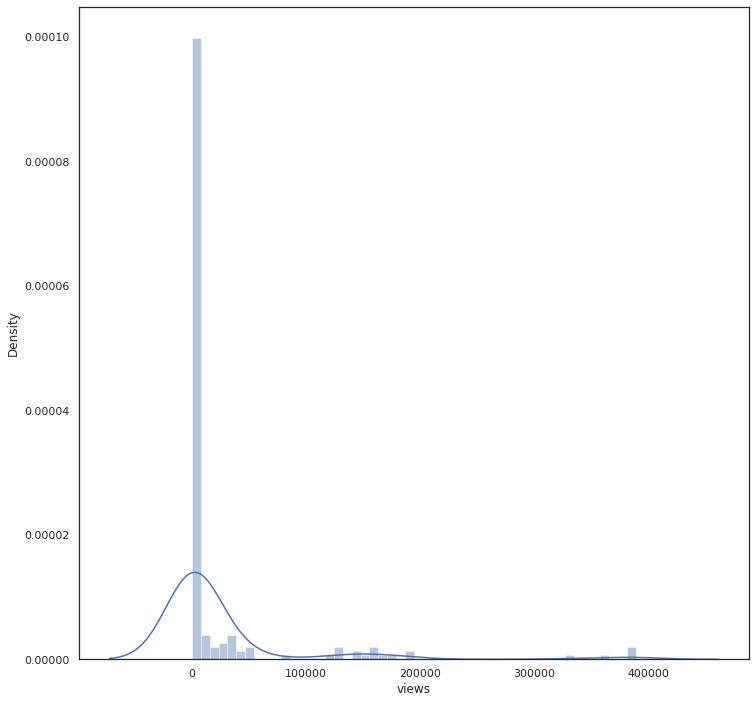

In [17]:
da = pd.read_csv("koniq10k/ratings.csv")
da["image_path"] = da["file"].apply(lambda x: "koniq10k/images/" + os.path.basename(x))
da["isfile"] = da["image_path"].apply(isfile)
da = da[da["isfile"]]

da[["likes", "views"]] = da.apply(random_likes_views, axis=1, result_type="expand")

da = da[["image_path", "likes", "views"]]
d(da)
da["real"] = False
sns.distplot(da["views"])

In [18]:
dlv = dlv.append(da, ignore_index=True)
d(dlv)

,image_path,likes,views,real
0,pixabay_first50k/images/duck-4934652.jpg,1,83,True
1,pixabay_first50k/images/frog-3386397.jpg,3,251,True
2,pixabay_first50k/images/gulls-84208.jpg,2,589,True
3,pixabay_first50k/images/swan-fight-4066486.jpg,1,292,True
4,pixabay_first50k/images/fragrapanti-4366075.jpg,3,410,True
...,...,...,...,...
920,koniq10k/images/610496828.jpg,50,6186,False
921,koniq10k/images/5435410945.jpg,153,50840,False
922,koniq10k/images/5456373866.jpg,37,817,False
923,koniq10k/images/8385411442.jpg,0,42,False


,image_path,likes,views
0,own/images/IMG_4480.jpg,2,127
1,own/images/IMG_7057.jpg,5,343
2,own/images/IMG_6222.jpg,4,205
3,own/images/IMG_20190513_210752882.jpg,7,293
4,own/images/IMG_20190604_212833103.jpg,21,110
...,...,...,...
131,own/images/IMG_5150.jpg,26,129
132,own/images/IMG_1665.jpg,17,4755
133,own/images/IMG_20170907_182814017.jpg,1166,388818
134,own/images/IMG_4558.jpg,747,274800


/home/sgoering/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


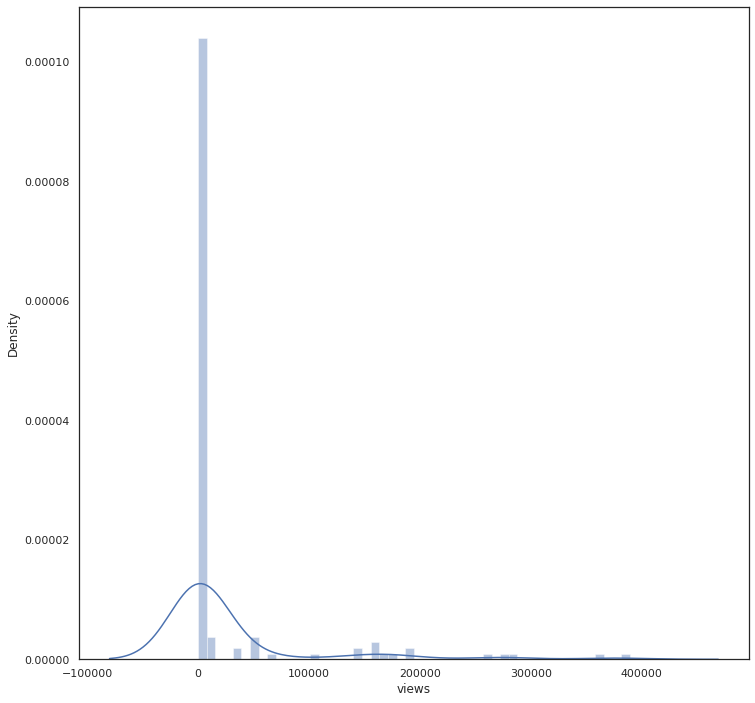

In [19]:
da = pd.DataFrame({
    "image_path": glob.glob("own/images/*")
})
da[["likes", "views"]] = da.apply(random_likes_views, axis=1, result_type="expand")

da = da[["image_path", "likes", "views"]]
d(da)
da["real"] = False
sns.distplot(da["views"])


In [20]:
dlv = dlv.append(da, ignore_index=True)
d(dlv)

,image_path,likes,views,real
0,pixabay_first50k/images/duck-4934652.jpg,1,83,True
1,pixabay_first50k/images/frog-3386397.jpg,3,251,True
2,pixabay_first50k/images/gulls-84208.jpg,2,589,True
3,pixabay_first50k/images/swan-fight-4066486.jpg,1,292,True
4,pixabay_first50k/images/fragrapanti-4366075.jpg,3,410,True
...,...,...,...,...
1056,own/images/IMG_5150.jpg,26,129,False
1057,own/images/IMG_1665.jpg,17,4755,False
1058,own/images/IMG_20170907_182814017.jpg,1166,388818,False
1059,own/images/IMG_4558.jpg,747,274800,False


In [25]:
dlv.to_json("likes_views.json", orient="records", indent=4)